# ASTR 502 Final: The 2D KS Test Analog
## Spencer Scott

## Contents
1. A brief review of the 1D KS test
2. The 2D analog of the KS test
3. Applying this analog to real data
4. References

# 1. A brief review of the 1D KS Test

The Kolmogorov-Smirnoff (KS) test, is, simply put: a statistical test which seeks to answer the question of whether or not a sample was likely drawn from a known distribution (the 1 sample KS test) or whether 2 samples were likely drawn from the same distribution (the 2 sample KS test). More specifically, the KS test measures the greatest distance between greatest distance between the cumulative distributions of a sample and a model or two samples. Mathematically speaking, the KS test defines an empirical distribution function $F_n(x)$: 

$F_n(x) = \frac{1}{n} \Sigma_{i=1}^nI(X_i \leq x)$ where $I$ is a function that returns 1 if true, and 0 otherwise. The one sample KS statistic $D$ with respect to model $F_0$ is then 

$D = n^{1/2} max(|F_n(x) - F_0(x)|)$ where n is the number of samples. Then, tables of values of $D$ which correspond to critical values of $p$, the significance, can be used to evaluate whether or not it is likely that $F_n$ and $F_0$ are the same distribution. The application to 2 samples is similar, but replace $F_0$ with the e.d.f. of the second sample (Feigelson \& Babu).

Here I will mainly focus on the 2 sample test and its analog, but it is worth noting that both tests are implemented in scipy.stats. In each case, the function will return the KS statistic D, as well as the p value associated with that value of $D$. Values of p < 0.05 indicate that the two samples were likely drawn from different distribution at the 95\% confidence level.

A quick demonstration of the 1D, 2 sample KS test in scipy.stats can be found below. 

In [3]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

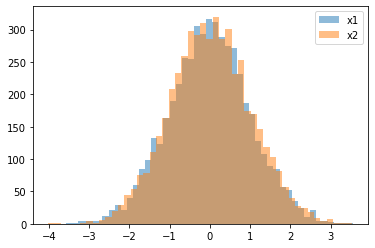

In [4]:
# generate 2 samples from the same parent distribution
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=0, scale=1, size=5000)

# plot to show distributions are very similar
plt.hist(x1, bins='fd', alpha=0.5, label='x1')
plt.hist(x2, bins='fd', alpha=0.5, label='x2')
plt.legend()
plt.show()

In [5]:
# KS test to see if it is likely that distributions are different
D, p = stats.ks_2samp(x1, x2)
print(f'D:{D}, p:{p}')

D:0.0186, p:0.352690607768387


As expected, p > 0.05, so at this significance level, it seems as though the samples are drawn from similar distributions, which they are. 

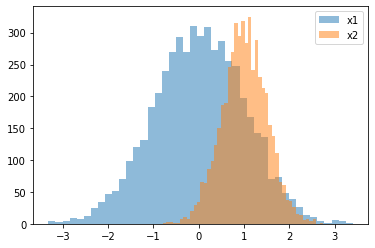

D:0.5364, p:0.0


In [8]:
# now repeat for different distributions
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=1, scale=0.5, size=5000)

plt.hist(x1, bins='fd', alpha=0.5, label='x1')
plt.hist(x2, bins='fd', alpha=0.5, label='x2')
plt.legend()
plt.show()

# KS test to see if it is likely that distributions are different
D, p = stats.ks_2samp(x1, x2)
print(f'D:{D}, p:{p}')

As expected, p is very small, so it is likely that these two samples are drawn from 2 different distributions, which they indeed are. 

# 2. The 2D analog of the KS test

As we can see in Section 1, the KS test relies on cumulative distribution functions, which are only well defined in 1 dimension. However, it is possible to use an analog of the KS test for 2 dimensions, as presented by Peacock 1983 and Fasano \& Franceschini 1987. I have implemented this algorithm, as seen in Numerical Recipes (Press+2007). The algorithm as described by Ivezic+ 2014 (quoted below) and Numerical Recipes (as implemented) is as follows: 

"Given two sets of points, {$x^A_i, y^A_i$}, $i = 1,..., N_A$ and {$x^B_i , $y^B_i$) $i = 1,..., N_B$ , define four quadrants centered on point $(x_j^A, y_j^A)$ and compute the fraction of data points from each data set in each quadrant. Record the maximum difference (among the four quadrants) between the fractions for data sets A and B. Repeat for all points from sample A to get the overall maximum difference, DA, and repeat the whole procedure for sample B. The final statistic is then D = (DA + DB )/2." 

It is important to note that this final statistic D is not *exactly* the same as the statistic D as in the 1D KS test. Rather, it is a numerical approximation, valid when $N > 20$ or so, where $N = \frac{N_1N_2}{N1 + N_2}$ . While it is not exactly the same (especially for p > 0.2), the conclusions drawn from the p values are the same. Also of note is the runtime hit for using multiple dimensions: this multidimensional KS test takes $O(n^2)$ time, whereas the 1D version is $O(n \mathrm{log}(n))$. (Press+ 2007)

I've implemented this algorithm as laid out in Numerical Recipes, which I've included in ks2d2s.py, and will demonstrate it below. 

In [9]:
import ks2d2s as ks

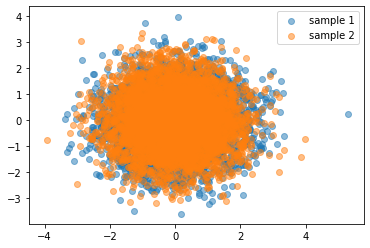

In [10]:
# generate 2 2D samples from the same parent distribution
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=0, scale=1, size=5000)
y1 = np.random.normal(loc=0, scale=1, size=5000)
y2 = np.random.normal(loc=0, scale=1, size=5000)

# plot to show distributions are very similar
# use scatter plot for visualization purposes, 
# though contours would be better
plt.scatter(x1, y1, alpha=0.5, label='sample 1')
plt.scatter(x2, y2, alpha=0.5, label='sample 2')
plt.legend()
plt.show()

In [11]:
# 2D KS test
p = ks.ks2d2s(x1, y1, x2, y2)
print(f'p: {p}')

p: 0.3777694969946867


Again, as expected, p > 0.05, indicating that these samples are likely drawn from similar distributions, which we know they are. 

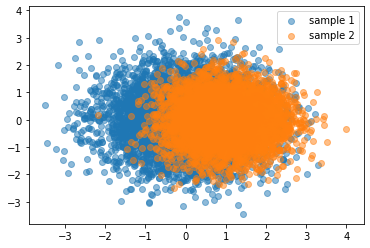

p: 3.1159627741362745e-279


In [16]:
# Do the same for different distributions
x1 = np.random.normal(loc=0, scale=1, size=5000)
y1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=1, scale=0.75, size=5000)
y2 = np.random.normal(loc=0, scale=0.75, size=5000)

plt.scatter(x1, y1, alpha=0.5, label='sample 1')
plt.scatter(x2, y2, alpha=0.5, label='sample 2')
plt.legend()
plt.show()

# 2D KS test
p = ks.ks2d2s(x1, y1, x2, y2)
print(f'p: {p}')

Once again, we can see that the p value is exceedingly small, so it is likely that these 2 samples are drawn from different distributions, which we know they are. 

# 3. Applying the 2D KS test  to real data

For my research project, I am empirically modeling broad-band galaxy colors using The UniverseMachine 
(Behroozi+ 19). The UniverseMachine utilizes dark matter simulations to parameterize galaxy formation and "paint" galaxies onto dark matter halos such that the galaxies match the observed properties of the observed universe. In its initial release, The UniverseMachine parameterized the star formation rate (SFR) of galaxies as a function of their halo mass, utilizing constraints like the IRX-$\beta$ relation and measured stellar masses. However, these are not directly observed quantities, as they are calculated. When we look at the universe, we see galaxy colors. So, for my 2nd year project, I aim to modify The UniverseMachine to match observed galaxy color distributions. To do so, we need a method with which we can compare multidimensional galaxy color distributions so that we can see if our modeled colors match the distribution of actual, observed colors. One possible way to do this is to use the multidimensional KS test that I implemented in Python.

Below are color-color plots for galaxies selected in the GALEX, SDSS, and WISE surveys (in blue) and galaxies generated by the UniverseMachine (in red). For this case, the UniverseMachine galaxy colors are calculated with constant metallicities and a simple Calzetti dust law. These are not realistic (which is what my project aims to fix) but it works as a proof of concept for the 2D KS test. 

Note: the data to generate these plots are not included, so do not attempt to re-run these cells. However, ks2d2s.py is included should anyone need to use it.

In [17]:
import pandas as pd
import matplotlib as mpl

In [18]:
um_dat = pd.read_csv('/home/spencerscott/repos/um_dust/data/raw/colors_0.911185.3.txt', sep=' ')
cat_dat = pd.read_csv('/home/spencerscott/repos/um_dust//data/processed/cami_catalog.csv')

In [19]:
cat_col = pd.DataFrame()
cat_col['NUV-g'] = cat_dat['NUV'] - cat_dat['g']
cat_col['g-r'] = cat_dat['g'] - cat_dat['r']
cat_col['r-i'] = cat_dat['r'] - cat_dat['i']
cat_col['i-z'] = cat_dat['i'] - cat_dat['z']
cat_col['z-w1'] = cat_dat['z'] - cat_dat['W1']

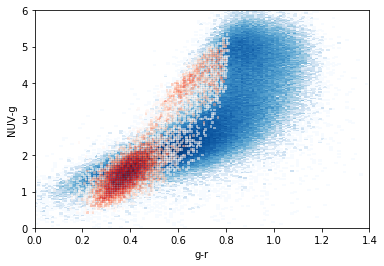

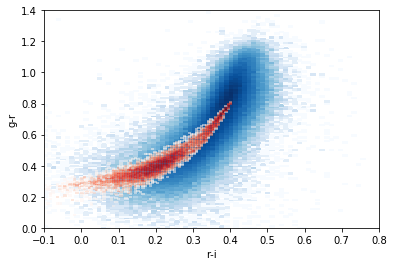

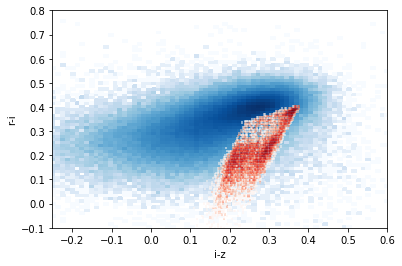

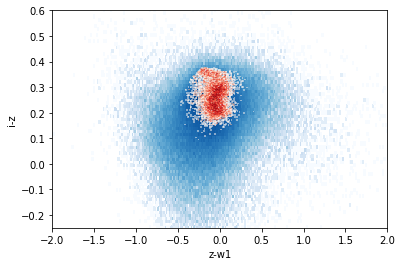

In [20]:
def plot(x,y):
    nuvg_lim = (0,6)
    gr_lim = (0,1.4)
    ri_lim = (-0.1,.8)
    iz_lim = (-0.25,0.6)
    zw1_lim = (-2,2)
    lims = {'NUV-g':nuvg_lim, 'g-r':gr_lim, 'r-i':ri_lim, 'i-z':iz_lim, 'z-w1':zw1_lim}
    cmap1 = mpl.cm.Blues
    cmap2 = mpl.cm.Reds
    plt.hist2d(cat_col[x], cat_col[y], norm=mpl.colors.LogNorm(), cmap=cmap1, bins=300)
    plt.hist2d(um_dat[x], um_dat[y], norm=mpl.colors.LogNorm(), cmap=cmap2, bins=100, alpha=0.5)
    plt.xlim(lims[x])
    plt.ylim(lims[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
plot('g-r', 'NUV-g')
plot('r-i', 'g-r')
plot('i-z', 'r-i')
plot('z-w1', 'i-z')

As you can see, the distribution shapes are not the same (which we would not expect for such a simple guess at dust and metallicity prescriptions). So, below I quantify this using the 2D KS test. 

In [24]:
# do the test only on a subsample of data due to N^2 runtime and large datasets
um_dat = um_dat.sample(5000)
cat_col = cat_col.sample(5000)

p1 = ks.ks2d2s(um_dat['g-r'].values, um_dat['NUV-g'].values, cat_col['g-r'].values, cat_col['NUV-g'].values)
p2 = ks.ks2d2s(um_dat['r-i'].values, um_dat['g-r'].values, cat_col['r-i'].values, cat_col['g-r'].values)
p3 = ks.ks2d2s(um_dat['i-z'].values, um_dat['r-i'].values, cat_col['i-z'].values, cat_col['r-i'].values)
p4 = ks.ks2d2s(um_dat['z-w1'].values, um_dat['i-z'].values, cat_col['z-w1'].values, cat_col['i-z'].values)

print(f'g-r, NUV-g p-value: {p1}')
print(f'r-i, g-r p-value: {p2}')
print(f'i-z, r-i p-value: {p3}')
print(f'z-w, i-z p-value: {p4}')

g-r, NUV-g p-value: 0.0
r-i, g-r p-value: 0.0
i-z, r-i p-value: 0.0
z-w, i-z p-value: 2.7315662997211873e-245


Once again, we see the small p-values which we would expect by looking at this by eye. While we have only shown this numerically for a subsample of the data, we would also expect this to hold for the full sample. 

# 4. References
Behroozi+ 2019, MNRAS 488

Fasano \& Franceschini 1987, MNRAS 225

Feigelson \& Babu, https://asaip.psu.edu/articles/beware-the-kolmogorov-smirnov-test/

Ivezic+ 2014, *Statistics, Data Mining, and Machine Learning in Astronomy* 

Peacock 1983, MNRAS 202

Press+ 2007, *Numerical Recipes, 3rd Edition* 

Note: the implementation of the 2D KS test was written in python, and is only partially vectorized at the moment, so it is not totally optimized. I plan on changing this in the future, including rewriting the relevant functions in C (or a similar language) and wrapping them in python to attempt to speed up the test. I will push those changes to this repository when available. 